# 1. **Import Libraries** 

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


 # 2. **Load Dataset into Pandas Dataframe**

In [14]:
traffic_dataset = pd.read_csv('TrafficTwoMonth.csv')
traffic_dataset

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


# 3. **Data Preprocessing**

#### 3.1 **Describe the dataset**

In [15]:
traffic_dataset.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000,5952.000000
mean,16.000000,65.440692,12.161458,12.912970,18.646337,109.161458
std,8.945023,44.749335,11.537944,12.497736,10.973139,55.996312
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.750000,3.000000,2.000000,10.000000,54.000000
50%,16.000000,62.000000,9.000000,10.000000,18.000000,104.000000
75%,24.000000,103.000000,19.000000,20.000000,27.000000,153.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


#### 3.2 **Fetch Dataset Information**

In [16]:
traffic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


#### 3.2 **Seperating AM from PM in a new column**

In [17]:
traffic_dataset['midday'] = ''
for i in range(len(traffic_dataset['Time'])):
  if traffic_dataset['Time'][i][-2:].endswith('AM'):
    traffic_dataset.loc[i, 'midday'] = 'AM'
  elif traffic_dataset['Time'][i][-2:].endswith('PM'):
    traffic_dataset.loc[i, 'midday'] = 'PM'

traffic_dataset['Time'] = traffic_dataset['Time'].str[:-2]
traffic_dataset


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,13,2,2,24,41,normal,AM
1,12:15:00,10,Tuesday,14,1,1,36,52,normal,AM
2,12:30:00,10,Tuesday,10,2,2,32,46,normal,AM
3,12:45:00,10,Tuesday,10,2,2,36,50,normal,AM
4,1:00:00,10,Tuesday,11,2,1,34,48,normal,AM
...,...,...,...,...,...,...,...,...,...,...
5947,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
5948,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
5949,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
5950,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


#### 4.1. **Time displayed in seconds**

In [18]:
traffic_dataset['Time'] = pd.to_datetime(traffic_dataset['Time']).dt.hour * 3600 + \
    pd.to_datetime(traffic_dataset['Time']).dt.minute * 60 + \
    pd.to_datetime(traffic_dataset['Time']).dt.second

C:\Users\User\AppData\Local\Temp\ipykernel_24548\2707208563.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  traffic_dataset['Time'] = pd.to_datetime(traffic_dataset['Time']).dt.hour * 3600 + \
C:\Users\User\AppData\Local\Temp\ipykernel_24548\2707208563.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_dataset['Time']).dt.minute * 60 + \
C:\Users\User\AppData\Local\Temp\ipykernel_24548\2707208563.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(traffic_dataset['Time']).dt.second


#### 4.2. **Normalize the data**

In [29]:
columns_to_drop = ['Time', 'Day of the week', 'Traffic Situation', 'midday']
not_normalized = traffic_dataset.drop(columns_to_drop, axis=1)

hierarchial_clusteringNotNormalized = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels_ward = hierarchial_clusteringNotNormalized.fit_predict(not_normalized)
print(labels_ward)

silhouette_avg = silhouette_score(not_normalized, labels_ward)
print("Silhouette Score:", silhouette_avg)

hierarchial_clustering_completeNotNormalized = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels_complete = hierarchial_clustering_completeNotNormalized.fit_predict(not_normalized)
print(labels_complete)

silhouette_avg = silhouette_score(not_normalized, labels_complete)
print("Silhouette Score:", silhouette_avg)

[2 2 2 ... 2 2 2]
Silhouette Score: 0.4060775696832017
[2 2 2 ... 2 2 2]
Silhouette Score: 0.4600099066431454


In [19]:
feature_except_target = traffic_dataset.drop(['Traffic Situation'], axis=1)
target_feature = traffic_dataset['Traffic Situation']

numeric_features = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']

normalization_scaler = MinMaxScaler()
feature_except_target[numeric_features] = normalization_scaler.fit_transform(feature_except_target[numeric_features])

label_encoder = LabelEncoder()
feature_except_target['midday'] = label_encoder.fit_transform(feature_except_target['midday'])
feature_except_target['Day of the week'] = label_encoder.fit_transform(feature_except_target['Day of the week'])
feature_except_target[['midday', 'Day of the week']] = normalization_scaler.fit_transform(feature_except_target[['midday','Day of the week']])

target_encoder = LabelEncoder()
target_feature = target_encoder.fit_transform(target_feature)

encoded_data_normalized = pd.concat([feature_except_target, pd.Series(target_feature, name='Traffic Situation')], axis=1)

encoded_data_normalized

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,0.833333,0.045714,0.028571,0.04,0.400000,0.077519,0.0,3
1,0.957447,0.300000,0.833333,0.051429,0.014286,0.02,0.600000,0.120155,0.0,3
2,0.978723,0.300000,0.833333,0.028571,0.028571,0.04,0.533333,0.096899,0.0,3
3,1.000000,0.300000,0.833333,0.028571,0.028571,0.04,0.600000,0.112403,0.0,3
4,0.000000,0.300000,0.833333,0.034286,0.028571,0.02,0.566667,0.104651,0.0,3
...,...,...,...,...,...,...,...,...,...,...
5947,0.829787,0.266667,0.666667,0.062857,0.042857,0.02,0.600000,0.135659,1.0,3
5948,0.851064,0.266667,0.666667,0.034286,0.000000,0.02,0.500000,0.081395,1.0,3
5949,0.872340,0.266667,0.666667,0.057143,0.057143,0.02,0.416667,0.093023,1.0,3
5950,0.893617,0.266667,0.666667,0.062857,0.071429,0.00,0.450000,0.104651,1.0,3


In [20]:
traffic_dataFeatures = encoded_data_normalized.drop(['Traffic Situation'], axis=1)

## 5. **Build the model**

In [21]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
labels = hierarchial_clustering.fit_predict(traffic_dataFeatures)
print(labels)

[0 0 0 ... 3 3 3]


## 6. **Use Silhouette Score to find accuracy**

In [22]:
silhouette_avg = silhouette_score(traffic_dataFeatures, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24820145768939184


In [23]:
hierarchial_clustering_complete = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels1 = hierarchial_clustering_complete.fit_predict(traffic_dataFeatures)
print(labels1)

silhouette_avg = silhouette_score(traffic_dataFeatures, labels1)
print("Silhouette Score:", silhouette_avg)

[3 3 3 ... 1 1 1]
Silhouette Score: 0.23362561999832002


## 7. **Visualization**

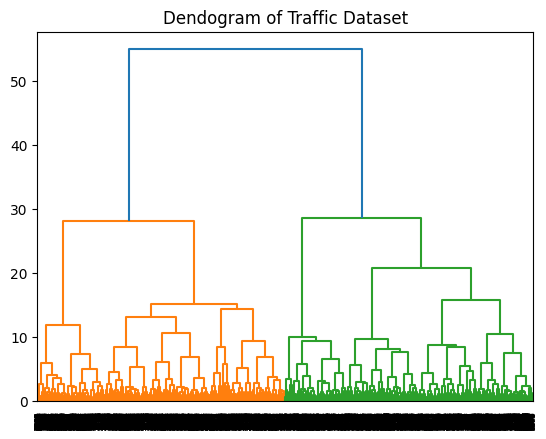

In [24]:
#complete = max agglomerative clustring
linkage_data = linkage(traffic_dataFeatures, method='ward', metric='euclidean')

dendrogram(linkage_data)
plt.title('Dendogram of Traffic Dataset')
traffic_dendogram = plt
traffic_dendogram.show()

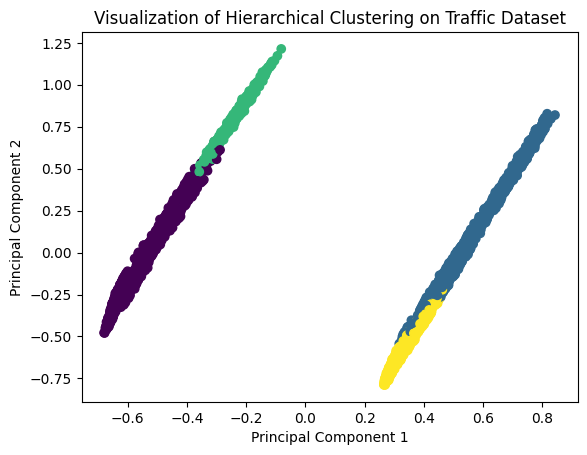

In [25]:
pca = PCA(n_components=2).fit(traffic_dataFeatures)
pca_2d = pca.transform(traffic_dataFeatures)
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=hierarchial_clustering.labels_, cmap='viridis')


plt.title("Visualization of Hierarchical Clustering on Traffic Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
